In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [381]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("sulteng.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  361 non-null    datetime64[ns]
 1   Tn       360 non-null    float64       
 2   Tx       358 non-null    float64       
 3   Tavg     348 non-null    float64       
 4   RH_avg   348 non-null    float64       
 5   RR       354 non-null    float64       
 6   ss       360 non-null    float64       
 7   ff_x     360 non-null    float64       
 8   ddd_x    360 non-null    float64       
 9   ff_avg   360 non-null    float64       
 10  ddd_car  360 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.1+ KB


<ipython-input-381-2938ac7888ac>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [382]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,22.0,33.8,0.0,27.9
1,2023-02-01,22.4,33.2,0.0,27.6
2,2023-03-01,21.4,36.2,0.1,28.4
3,2023-04-01,21.6,35.6,8888.0,29.8
4,2023-05-01,22.6,36.4,0.0,29.7
...,...,...,...,...,...
356,2023-12-12,23.6,35.0,0.0,29.3
357,2023-12-13,23.8,36.0,0.0,29.1
358,2023-12-14,24.2,34.0,0.0,28.4
359,2023-12-15,24.8,34.8,0.0,29.1


In [383]:
# cek duplikat
df1.duplicated().sum()

11

In [384]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [385]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [386]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,22.0,33.8,0.0,27.9
1,31,31,2023-01-02,22.0,29.8,0.1,26.1
2,59,60,2023-01-03,22.0,31.8,7.7,26.0
3,90,92,2023-01-04,22.8,31.6,0.0,26.2
4,120,123,2023-01-05,23.0,35.2,0.0,28.7
...,...,...,...,...,...,...,...
345,345,356,2023-12-12,23.6,35.0,0.0,29.3
346,346,357,2023-12-13,23.8,36.0,0.0,29.1
347,347,358,2023-12-14,24.2,34.0,0.0,28.4
348,348,359,2023-12-15,24.8,34.8,0.0,29.1


In [387]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          1
Tx          3
RR          7
Tavg       13
dtype: int64

In [388]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [389]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

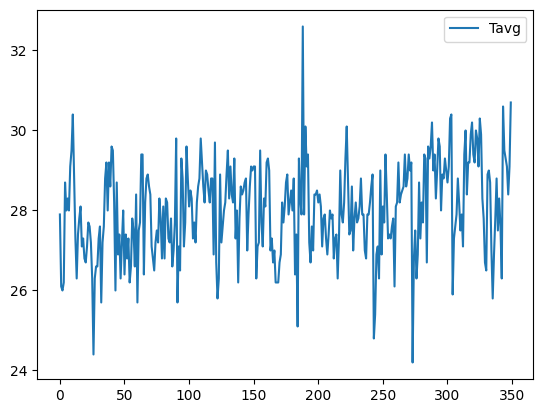

In [390]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

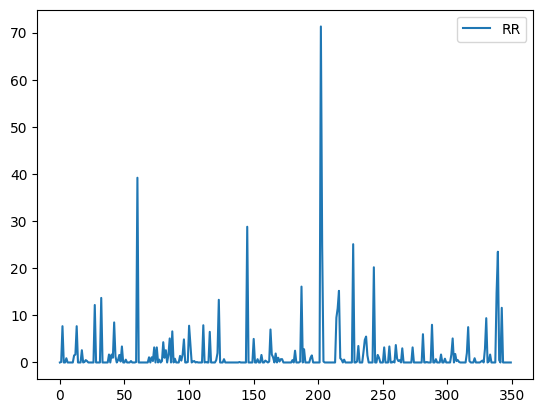

In [391]:
#plotting tavg
df1[['RR']].plot()

In [392]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.0,33.8,0.0,27.9,29.8,26.1,0.1
1,31,31,2023-01-02,22.0,29.8,0.1,26.1,31.8,26.0,7.7
2,59,60,2023-01-03,22.0,31.8,7.7,26.0,31.6,26.2,0.0
3,90,92,2023-01-04,22.8,31.6,0.0,26.2,35.2,28.7,0.0
4,120,123,2023-01-05,23.0,35.2,0.0,28.7,33.4,28.0,0.9
...,...,...,...,...,...,...,...,...,...,...
345,345,356,2023-12-12,23.6,35.0,0.0,29.3,36.0,29.1,0.0
346,346,357,2023-12-13,23.8,36.0,0.0,29.1,34.0,28.4,0.0
347,347,358,2023-12-14,24.2,34.0,0.0,28.4,34.8,29.1,0.0
348,348,359,2023-12-15,24.8,34.8,0.0,29.1,34.8,30.7,0.0


In [393]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.0,27.9,26.1,0.1
1,0.1,26.1,26.0,7.7
2,7.7,26.0,26.2,0.0
3,0.0,26.2,28.7,0.0
4,0.0,28.7,28.0,0.9
...,...,...,...,...
345,0.0,29.3,29.1,0.0
346,0.0,29.1,28.4,0.0
347,0.0,28.4,29.1,0.0
348,0.0,29.1,30.7,0.0


In [394]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.0,27.9,26.1,0.1
1,0.1,26.1,26.0,7.7
2,7.7,26.0,26.2,0.0
3,0.0,26.2,28.7,0.0
4,0.0,28.7,28.0,0.9
...,...,...,...,...
344,0.0,29.5,29.3,0.0
345,0.0,29.3,29.1,0.0
346,0.0,29.1,28.4,0.0
347,0.0,28.4,29.1,0.0


In [395]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [396]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.0,27.9,26.1,0.1,0
1,0.1,26.1,26.0,7.7,1
2,7.7,26.0,26.2,0.0,2
3,0.0,26.2,28.7,0.0,3
4,0.0,28.7,28.0,0.9,4
...,...,...,...,...,...
344,0.0,29.5,29.3,0.0,344
345,0.0,29.3,29.1,0.0,345
346,0.0,29.1,28.4,0.0,346
347,0.0,28.4,29.1,0.0,347


In [397]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [398]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [399]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [400]:
X_test

,Indeks,Tavg
279,279,27.3
280,280,28.2
281,281,27.7
282,282,29.4
283,283,29.3
...,...,...
344,344,29.5
345,345,29.3
346,346,29.1
347,347,28.4


In [401]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.76337653, 28.06303296, 27.89779286, 28.46310446, 28.43069194,
       27.56810703, 28.53190137, 28.43307506, 28.53349012, 28.73352586,
       28.33583749, 28.46945945, 28.10497797, 28.33822062, 28.60467015,
       28.53905074, 28.00891538, 28.30819122, 28.2757787 , 28.44260755,
       28.34378124, 28.24495492, 28.37857688, 28.777854  , 28.81185527,
       27.31833935, 27.78403026, 27.88444532, 27.98486038, 28.28451681,
       28.08606982, 27.85441592, 27.98803788, 27.72317709, 28.48773006,
       28.6877658 , 28.15724985, 28.42369939, 28.42449376, 28.65773641,
       28.75815147, 28.49329068, 28.42767126, 28.6941208 , 28.62850138,
       28.39684749, 28.79612461, 28.6640914 , 28.13357545, 27.96833534,
       27.60385387, 27.53823445, 28.33599432, 28.36999559, 28.27116927,
       27.70744643, 27.30975806, 27.67582828, 27.97548471, 28.30834804,
       27.87745277, 28.14390231, 27.91224842, 27.48135315, 28.91004403,
       28.54556255, 28.47994314, 28.41432372, 28.18266983, 28.41

In [402]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.9518432271227508 1.3425861594001745


In [403]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
279,279,27.3
280,280,28.2
281,281,27.7
282,282,29.4
283,283,29.3
...,...,...
344,344,29.5
345,345,29.3
346,346,29.1
347,347,28.4


In [404]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
279,27.763377
280,28.063033
281,27.897793
282,28.463104
283,28.430692
...,...
344,28.545563
345,28.479943
346,28.414324


In [405]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-405-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.9,NaN
1,26.1,NaN
2,26.0,NaN
3,26.2,NaN
4,28.7,NaN
...,...,...
344,29.5,28.545563
345,29.3,28.479943
346,29.1,28.414324
347,28.4,28.182670


<Axes: >

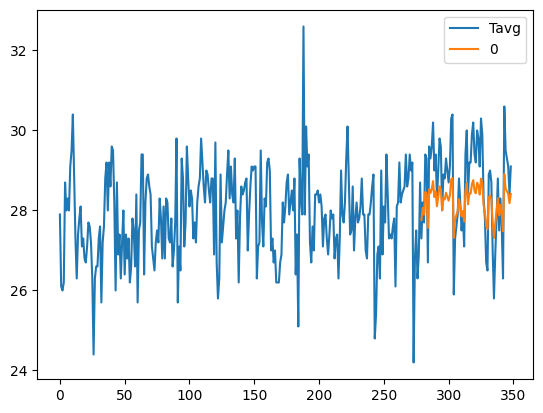

In [406]:
kan.plot()

In [407]:
new_data = [[350, 29.1],[351,29.1],[352,29.1],[353,29.1],[354,29.1],[355,29.1],[356,29.1]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.41750122, 28.41829559, 28.41908997, 28.41988434, 28.42067871,
       28.42147309, 28.42226746])

In [409]:
kan.to_json('prediksi sulteng')